In [6]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

In [7]:
# cargar datos
data = pd.read_csv('../data/raw/accidentes_transito.csv')

In [8]:
#Exploracion basica
print(data.info)
print(data.describe())
print(data.isnull().sum())

<bound method DataFrame.info of      Numero_expedient  Codi_districte Nom_districte  Codi_barri  \
0     2023S000699                  -1    Desconegut          -1   
1     2023S005197                  -1    Desconegut          -1   
2     2023S007430                  -1    Desconegut          -1   
3     2023S000961                  -1    Desconegut          -1   
4     2023S006486                  -1    Desconegut          -1   
...               ...             ...           ...         ...   
8892  2023S000678                   8    Nou Barris          44   
8893  2023S006888                   8    Nou Barris          44   
8894  2023S007283                   8    Nou Barris          45   
8895  2023S007283                   8    Nou Barris          45   
8896  2023S004812                   8    Nou Barris          44   

                          Nom_barri  Codi_carrer  \
0                        Desconegut           -1   
1                        Desconegut           -1   
2      

In [11]:
print(data.columns)

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ',
       'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes',
       'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_mediata',
       'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud_WGS84',
       'Latitud_WGS84'],
      dtype='object')


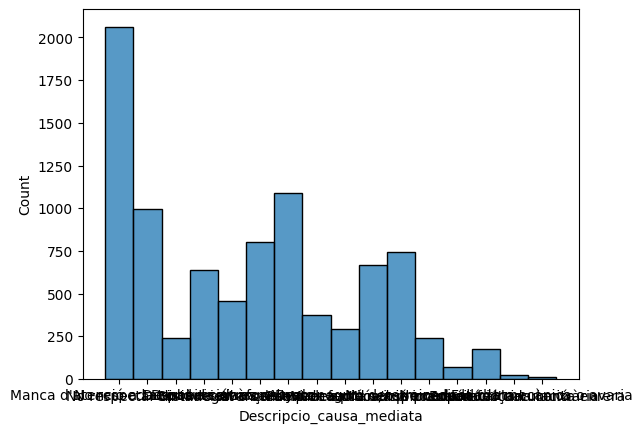

In [12]:
#visualizacion de distribuciones
sns.histplot(data['Descripcio_causa_mediata'])
plt.show()

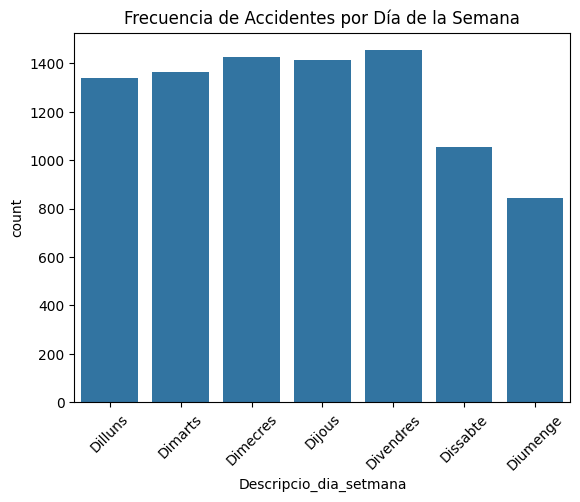

In [13]:
# Visualizar la frecuencia de accidentes por día de la semana
sns.countplot(x='Descripcio_dia_setmana', data=data, order=[
    "Dilluns", "Dimarts", "Dimecres", "Dijous", "Divendres", "Dissabte", "Diumenge"])
plt.title("Frecuencia de Accidentes por Día de la Semana")
plt.xticks(rotation=45)
plt.show()

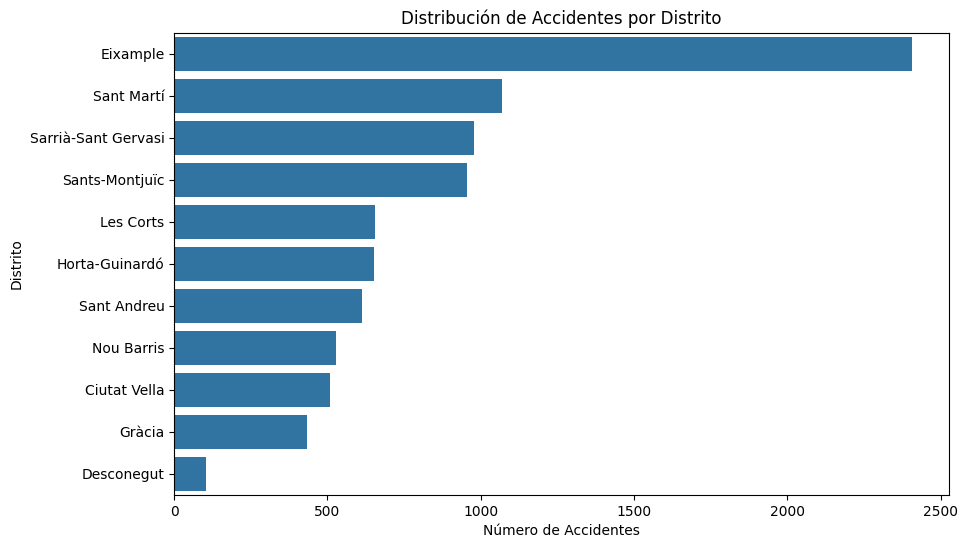

In [14]:
# Visualizar la distribución de accidentes por distrito
plt.figure(figsize=(10, 6))
sns.countplot(y='Nom_districte', data=data, order=data['Nom_districte'].value_counts().index)
plt.title("Distribución de Accidentes por Distrito")
plt.xlabel("Número de Accidentes")
plt.ylabel("Distrito")
plt.show()

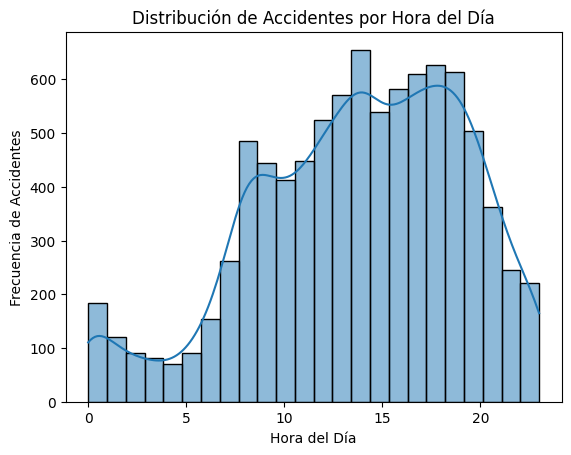

In [15]:
# Convertir la columna Hora_dia a tipo numérico si es necesario
data['Hora_dia'] = pd.to_numeric(data['Hora_dia'], errors='coerce')

# Visualizar la distribución de accidentes por hora del día
sns.histplot(data['Hora_dia'], bins=24, kde=True)
plt.title("Distribución de Accidentes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Frecuencia de Accidentes")
plt.show()

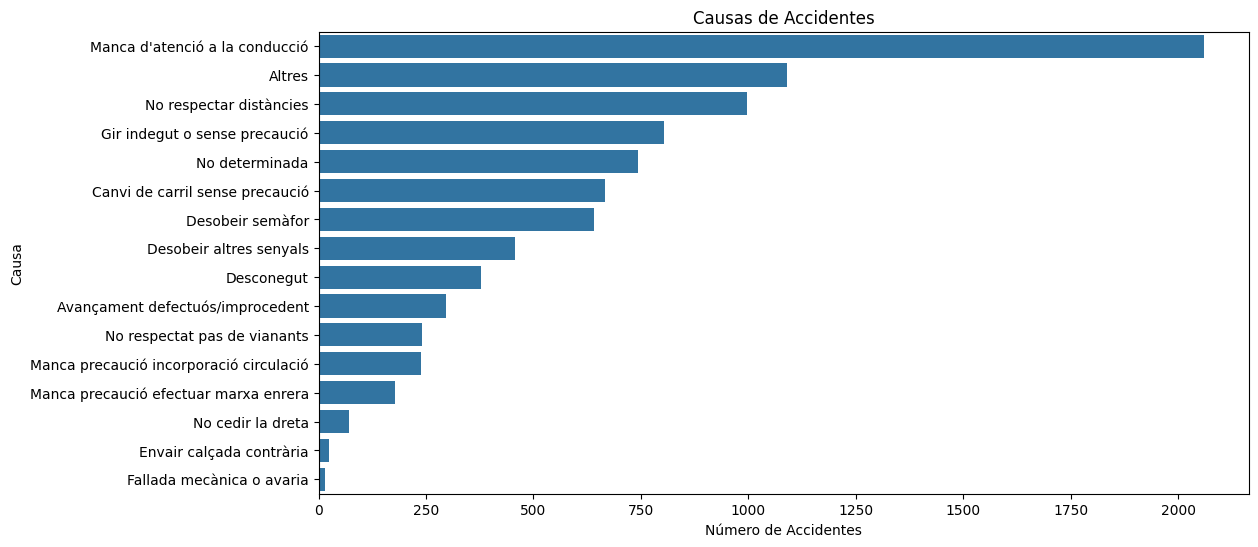

In [16]:
# Visualizar las causas más comunes de accidentes
plt.figure(figsize=(12, 6))
sns.countplot(y='Descripcio_causa_mediata', data=data, order=data['Descripcio_causa_mediata'].value_counts().index)
plt.title("Causas de Accidentes")
plt.xlabel("Número de Accidentes")
plt.ylabel("Causa")
plt.show()


In [23]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en las coordenadas medias de la ciudad
mapa = folium.Map(location=[data['Latitud_WGS84'].mean(), data['Longitud_WGS84'].mean()], zoom_start=12)

# Convertir las coordenadas a una lista de puntos
coordenadas = data[['Latitud_WGS84', 'Longitud_WGS84']].dropna().values.tolist()

# Añadir un mapa de calor
HeatMap(coordenadas).add_to(mapa)

# Guardar y mostrar el mapa
mapa.save("outputs/visualizations/mapa_calor_accidentes.html")
mapa

ModuleNotFoundError: No module named 'folium'